In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [63]:
def wrangle(file):
    
    #read csv into dataframe
    df = pd.read_csv(file)
    
    #split columns
    df[
        [
        "fixed acidity","volatile acidity", "citric acid","residual sugar","chlorides", "free sulfur dioxide","total sulfur dioxide","density", "pH","sulphates","alcohol","quality"
        ]
    ] = df['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'].str.split(';', expand=True).astype(float)
    #columns to drop
    cols_to_drop = []
    #drop column
    
    orig_column = 'fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'
    cols_to_drop.append(orig_column)
    
    #recast column
    df['quality_class'] = (df['quality'] > 6).astype(int)
    
    #drop leaky features
    cols_to_drop.append('quality')

    #drop multicollinearity
    collinear= ['residual sugar', 'density','free sulfur dioxide']
    cols_to_drop.extend(collinear)


    #drop columns
    df.drop(columns=cols_to_drop, inplace=True)

    return df

In [64]:
df = wrangle('winequality-white.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,pH,sulphates,alcohol,quality_class
0,7.0,0.27,0.36,0.045,170.0,3.00,0.45,8.8,0
1,6.3,0.30,0.34,0.049,132.0,3.30,0.49,9.5,0
2,8.1,0.28,0.40,0.050,97.0,3.26,0.44,10.1,0
3,7.2,0.23,0.32,0.058,186.0,3.19,0.40,9.9,0
4,7.2,0.23,0.32,0.058,186.0,3.19,0.40,9.9,0


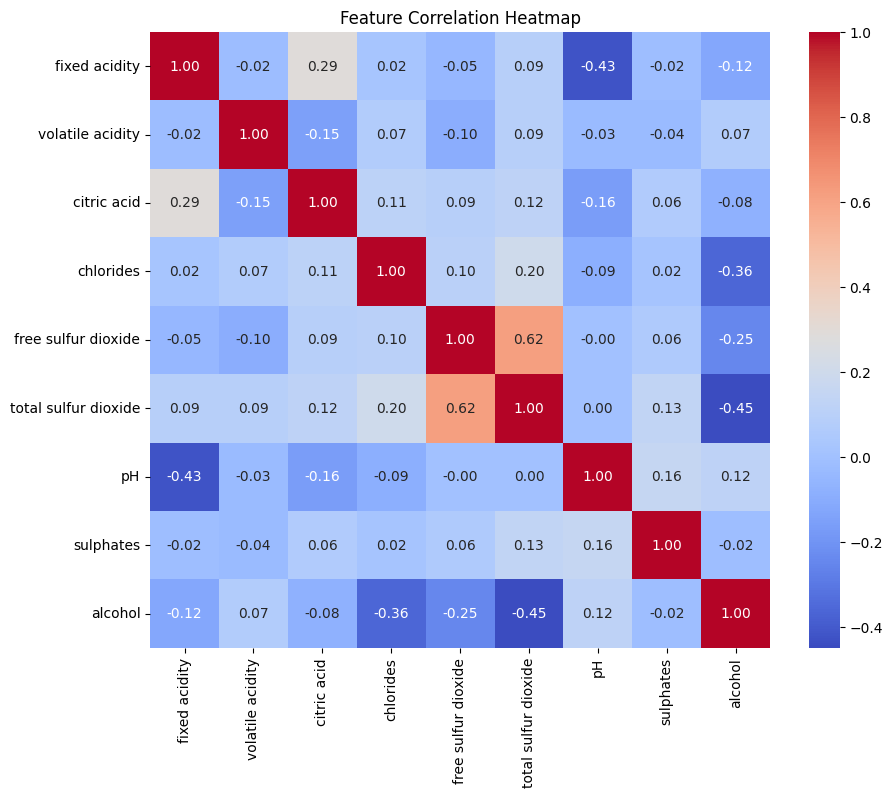

In [61]:
plt.figure(figsize=(10, 8))
correlation = df.drop(columns='quality_class').corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [62]:
print(df['free sulfur dioxide'].corr(df['quality_class']))
print(df['total sulfur dioxide'].corr(df['quality_class']))

-0.023413218599484226
-0.16220204539944144
